### Import the dataset (from 24th April 2022 to 17 May 2022) 

In [1]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
plt.rcParams['figure.figsize'] = (15, 9)
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('curved_labelled_data.csv')
df[['time']] = df[['time']].apply(pd.to_datetime)
df.rename(columns = {'Unnamed: 0':'x_column' }, inplace = True)

### Plotting the dataset 

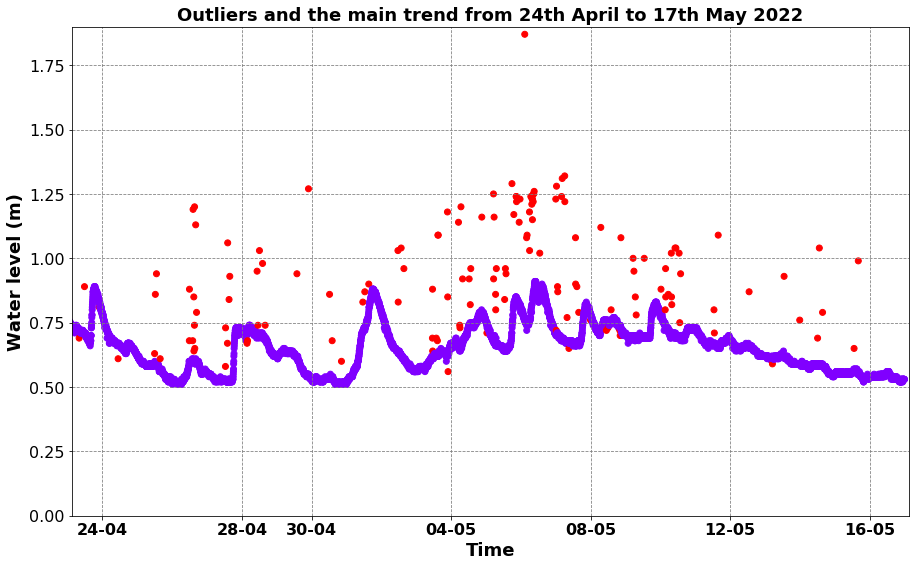

In [4]:
plt.rcParams['figure.figsize'] = (15, 9)
fig, ax = plt.subplots(1,1)
fig.patch.set_facecolor('white')
ax.scatter(df['time'],df['height'], c= df['data_label'], cmap='rainbow')
ax.grid(color = 'gray', linestyle = '--', linewidth = 0.8)
ax.set_title('Outliers and the main trend from 24th April to 17th May 2022', fontsize=18, weight='bold')
ax.set_xlabel('Time', fontsize=18, weight = 'bold')
ax.set_ylabel('Water level (m)', fontsize=18, weight = 'bold')
ax.set_xlim(['2022-04-24 00:00:00'],['2022-05-17 23:59:59'])
ax.set_ylim(0, 1.9)
ax.set_xticklabels(df['time'], fontsize=16, weight='bold')
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x',which='major', labelsize=16)

## Define the date format
date_form = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.set(facecolor = "white")

plt.savefig('sample_photo_curved.png', dpi=450, orientation='portrait', bbox_inches='tight', facecolor='w',edgecolor='b',)
plt.show()

### MLP Classifier

In [5]:
from sklearn.neural_network import MLPClassifier
import datetime as datetime
water_level = np.array(df['height']).reshape(-1, 1)
target_clusters =np.array(df['data_label']).reshape(-1,1) 

### Train-test split 

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(water_level ,target_clusters, test_size=0.3, random_state=1, stratify=target_clusters)

### water level data fitting 

In [7]:
model = MLPClassifier()
clf = model.fit(X_train, y_train.ravel())

In [8]:
y_pred = model.predict(X_test)

### Performance Metrics 

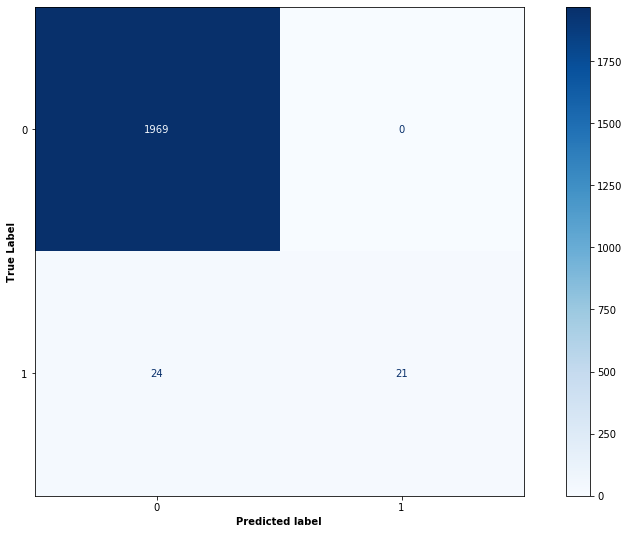

In [9]:
from sklearn.metrics import accuracy_score, f1_score,precision_score, recall_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
c_matrix = confusion_matrix (y_test, y_pred)
disp = ConfusionMatrixDisplay(c_matrix )
disp.plot(cmap=plt.cm.Blues,values_format='g',)
plt.xlabel('Predicted label', weight = 'bold')
plt.ylabel('True Label', weight = 'bold')


plt.savefig('con1.png', dpi=450, orientation='portrait', bbox_inches='tight', facecolor='w',edgecolor='b',)
plt.show()

In [10]:
data_accuracy = accuracy_score (y_test, y_pred)
data_accuracy

0.9880834160873883

In [11]:
data_precision = precision_score (y_test, y_pred)
data_precision

1.0

In [12]:
data_recall_score = recall_score (y_test, y_pred)
data_recall_score

0.4666666666666667

In [13]:
data_f1_score = f1_score (y_test, y_pred)
data_f1_score

0.6363636363636364